In [ ]:
# Import Packages

from bs4 import BeautifulSoup
import requests
import spacy
from spacy.matcher import Matcher
import re
from collections import Counter
from gensim import corpora

nlp = spacy.load('en_core_web_sm')


In [ ]:
# Import Data(Corpus)

url = 'https://www.tribunnews.com/metropolitan/2021/06/21/tekan-lonjakan-kasus-corona-wagub-dki-kebijakan-pengetatan-segera-diumumkan'
req = requests.get(url)

html = req.text
soup = BeautifulSoup(html,'html.parser')
text = soup.findAll('p')

In [ ]:
# Putting the text of each "p tag" into "paragraphs" list

paragraphs = [ ]
for x in text:
    paragraphs.append(str(x.text))

In [ ]:
# Puting all alphanumerics from each paragraphs into "clean" list  

clean = [ ]
for w in paragraphs[:]:
    clean.append(re.findall(r'\W',w))

In [ ]:
# Joining all alphanumerics from "clean" into "joined"

joined = [ ]
for alpha in clean:
  # Convert each item in the list to a string, and then join them
  joined.append(' '.join(map(str, alpha)))
alljoined = ''.join(joined)

# Removing all emty spaces from the "alljoined" string

print("Emty spaces removed and joined from 'clean' list: " + "\n\n" + alljoined.replace(" ","") + "\n")

# Cleaning each paragraphs with the "clean" list

cleared = [ ]
for item in paragraphs[:]:
    for c in alljoined.replace(" ",""):
        if c in item:
            item = item.replace(c, "")
    cleared.append(item) 
    
# Clearing out empty items from the "cleared" list

none_spaces = [item for item in cleared if item != '' and item !=' ']
# Removing unnecessary paragraphs
none_spaces.pop(9)
none_spaces.pop(8)
none_spaces.pop(7)

print("Final result: \n\n " + str(none_spaces))


Emty spaces removed and joined from 'clean' list: 

.,.,-,-.-."-,.,,,,,-,",(//).,-,,,().().:-,:.",-,,,,,-,.,,,".,-..,(//)...-.(/)...-.  

Final result: 

 ['Laporan wartawan tribunnewscom Danang Triatmojo', 'TRIBUNNEWSCOM JAKARTA  Gubernur DKI Jakarta Anies Baswedan segera mengumumkan kebijakan pengetatan di wilayah ibu kota menyusul laporan harian kasus Covid19 yang terus melambung', 'Wakil Gubernur DKI Ahmad Riza Patria mengaku Pemprov DKI saat ini masih terus berkoordinasi dengan pemerintah pusat terkait hal  hal pengetatan tersebut', 'Kami sudah diskusikan bahas terkait kebijakan tentang PPKM pengetatat dan lainlain akan segera diumumkan pak gubernur', 'Kita tunggu saja kami sedang terus berkoordinasi dengan pemerintah pusat bersabar sebentar tidak lama lagi Pemprov akan mengambil kebijakan dalam rangka pencegahan penanganan pengendalian Covid19 di wilayah DKI kata Riza kepada wartawan Senin 2162021', 'Selain mengkaji rencana penutupan tempat wisata Pemprov juga berkoordinasi terka

In [ ]:
document = ''
for t in none_spaces:
    document += t.lower()

In [ ]:
doc =nlp(document)
nlp.Defaults.stop_words.add('the')
nlp.Defaults.stop_words.add('by')
nlp.Defaults.stop_words.add('that')
nlp.Defaults.stop_words.add('That')
nlp.Defaults.stop_words.add('The')
nlp.Defaults.stop_words.add('All')

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from collections import defaultdict
from gensim import models
from gensim.utils import lemmatize


paragraph_list = []
# Removing stopwords from "none_spaces" list into "paragraph_list".
for tx in none_spaces:
    clear_stop_words = remove_stopwords(tx.lower())
    token_paragraph =  nlp(clear_stop_words)
    text = []
    for token in token_paragraph:
        text.append(token.lemma_)
    paragraph_list.append(text)
    
frequency = defaultdict(int)
for text in paragraph_list:
    for token in text:
        frequency[token] += 1

processed_corpus = [[token for token in text if frequency[token] > 1] for text in paragraph_list]

print(processed_corpus)

[['laporan', 'wartawan', 'tribunnewscom'], ['tribunnewscom', 'jakarta', 'gubernur', 'dki', 'jakarta', 'segera', 'kebijakan', 'pengetatan', 'di', 'wilayah', 'laporan', 'harian', 'kasus', 'covid19', 'yang', 'terus'], ['gubernur', 'dki', 'riza', 'pemprov', 'dki', 'ini', 'masih', 'terus', 'berkoordinasi', 'dengan', 'pemerintah', 'pusat', 'terkait', 'hal', 'hal', 'pengetatan'], ['kami', 'terkait', 'kebijakan', 'dan', 'akan', 'segera', 'diumumkan', 'pak', 'gubernur'], ['kita', 'kami', 'terus', 'berkoordinasi', 'dengan', 'pemerintah', 'pusat', 'pemprov', 'akan', 'kebijakan', 'dalam', 'covid19', 'di', 'wilayah', 'dki', 'riza', 'wartawan', 'senin'], ['tempat', 'pemprov', 'juga', 'berkoordinasi', 'terkait', 'tempat', 'tempat', 'rumah', 'dan', 'kebijakan', 'dari', 'rumah'], ['pemprov', 'bersama', 'jajaran', 'forkopimda', 'juga', 'aspirasi', 'dari'], ['dari', 'kami', 'pemprov', 'bersama', 'forkopimda', 'dan', 'jajaran', 'aspirasi', 'dengan', 'nanti', 'akan', 'diumumkan', 'pak', 'gubernur', 'nanti'

In [ ]:
# Creating the dictionary for further use
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary.token2id)

{'laporan': 0, 'tribunnewscom': 1, 'wartawan': 2, 'covid19': 3, 'di': 4, 'dki': 5, 'gubernur': 6, 'harian': 7, 'jakarta': 8, 'kasus': 9, 'kebijakan': 10, 'pengetatan': 11, 'segera': 12, 'terus': 13, 'wilayah': 14, 'yang': 15, 'berkoordinasi': 16, 'dengan': 17, 'hal': 18, 'ini': 19, 'masih': 20, 'pemerintah': 21, 'pemprov': 22, 'pusat': 23, 'riza': 24, 'terkait': 25, 'akan': 26, 'dan': 27, 'diumumkan': 28, 'kami': 29, 'pak': 30, 'dalam': 31, 'kita': 32, 'senin': 33, 'dari': 34, 'juga': 35, 'rumah': 36, 'tempat': 37, 'aspirasi': 38, 'bersama': 39, 'forkopimda': 40, 'jajaran': 41, 'nanti': 42, 'atau': 43, 'hari': 44, 'pada': 45, 'positif': 46, 'tambahan': 47, 'orang': 48, 'aktif': 49, 'jumlah': 50}


In [ ]:
# Bow = bags of words
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [ ]:
# Calculating  words frequency
# TFIDF = Term Frequency Inverse Document Frequency
tfidf = models.TfidfModel(bow_corpus)

# Split the document string
words = document.split()

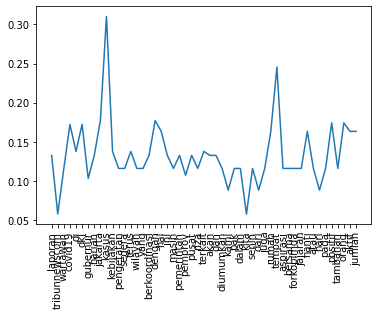

In [ ]:
import matplotlib.pyplot as plt
tfidf_weighing = tfidf[dictionary.doc2bow(words)]
# Zipped_list =list(zip(*testList2))

# Creating parameters for the plot model
x_values = []
y_values = []
for item in tfidf_weighing[:]:
    value = list(item)
    x_values.append(value[0])
    y_values.append(value[1])
plot_topics = [] 
# Creating the labels for axis [covid19, jakarta...]
for k in dictionary.token2id:
    plot_topics.append(k)
# Designing the plot    
plt.xticks(range(51), plot_topics ,rotation='vertical')
plt.plot(x_values,y_values)
plt.show()

In [ ]:
from gensim.models.ldamodel import LdaModel

lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary,  num_topics=5)
print(lda_model.show_topics())

[(0, '0.062*"terkait" + 0.062*"akan" + 0.062*"gubernur" + 0.062*"kebijakan" + 0.062*"kami" + 0.062*"pak" + 0.062*"dan" + 0.062*"segera" + 0.062*"diumumkan" + 0.011*"pemprov"'), (1, '0.128*"kasus" + 0.066*"covid19" + 0.046*"orang" + 0.046*"hari" + 0.046*"di" + 0.046*"jakarta" + 0.046*"pada" + 0.046*"aktif" + 0.046*"jumlah" + 0.046*"atau"'), (2, '0.074*"harian" + 0.074*"hari" + 0.074*"positif" + 0.074*"tambahan" + 0.074*"orang" + 0.074*"ini" + 0.013*"kebijakan" + 0.012*"laporan" + 0.012*"tribunnewscom" + 0.012*"wartawan"'), (3, '0.062*"pemprov" + 0.053*"tempat" + 0.045*"dari" + 0.037*"wartawan" + 0.036*"berkoordinasi" + 0.036*"juga" + 0.036*"rumah" + 0.036*"kebijakan" + 0.036*"dengan" + 0.030*"forkopimda"'), (4, '0.062*"dki" + 0.053*"gubernur" + 0.044*"dengan" + 0.043*"terus" + 0.043*"jakarta" + 0.043*"pengetatan" + 0.043*"hal" + 0.033*"pemprov" + 0.032*"pusat" + 0.031*"pemerintah"')]


In [ ]:
# Calculating the efficiency for the LDA model with c_v measure
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3911430292270916
